In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
df = pd.read_csv('Admission_Predict.csv', sep = ',')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [6]:
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
ChanceOfAdmit        400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


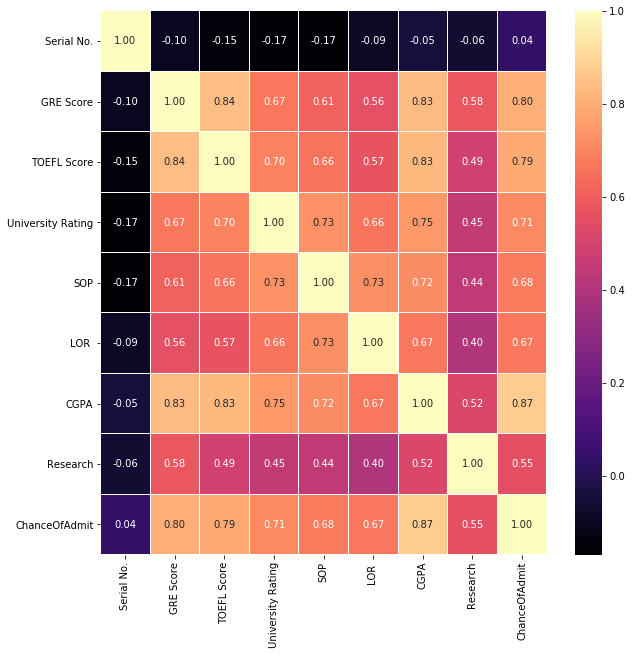

In [8]:
fig,axs = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt='.2f', cmap='magma')
plt.show()

Not having research:  181
Having research:  219


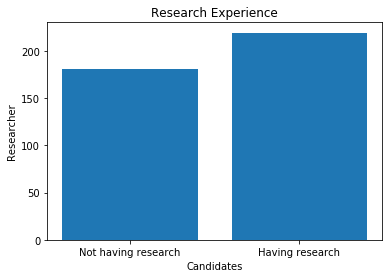

In [9]:
print("Not having research: " , len(df[df.Research == 0]))
print("Having research: " , len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]), len(df[df.Research == 1])])
x = ["Not having research", "Having research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Researcher")
plt.show()

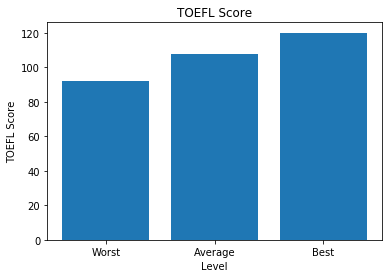

In [10]:
y = np.array([df["TOEFL Score"].min(), df["TOEFL Score"].mean(), df["TOEFL Score"].max()])
x = ["Worst", "Average", "Best"]
plt.bar(x,y)
plt.title("TOEFL Score")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()



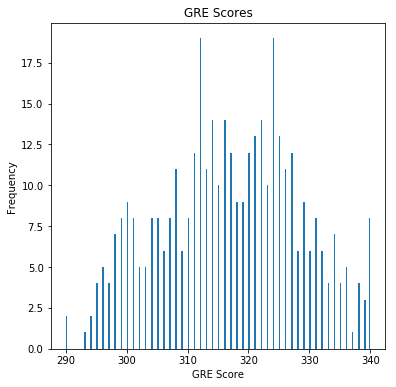

In [11]:
df['GRE Score'].plot(kind = 'hist', bins = 200, figsize=(6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

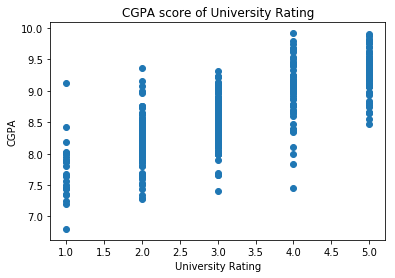

In [12]:
plt.scatter(df["University Rating"], df.CGPA)
plt.title("CGPA score of University Rating")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

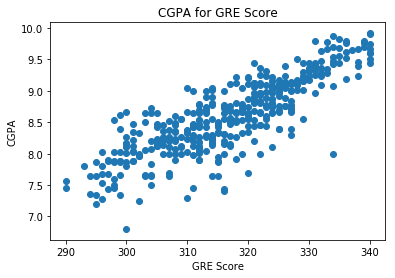

In [13]:
plt.scatter(df["GRE Score"], df.CGPA)
plt.title("CGPA for GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

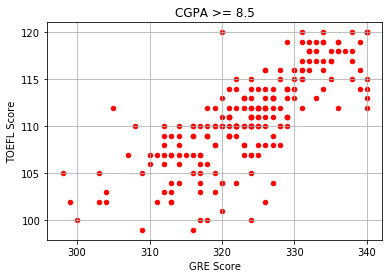

In [14]:
df[df.CGPA >= 8.5].plot(kind = 'scatter', x = 'GRE Score', y = 'TOEFL Score', color = 'red')
plt.title("CGPA >= 8.5")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.grid(True)
plt.show()

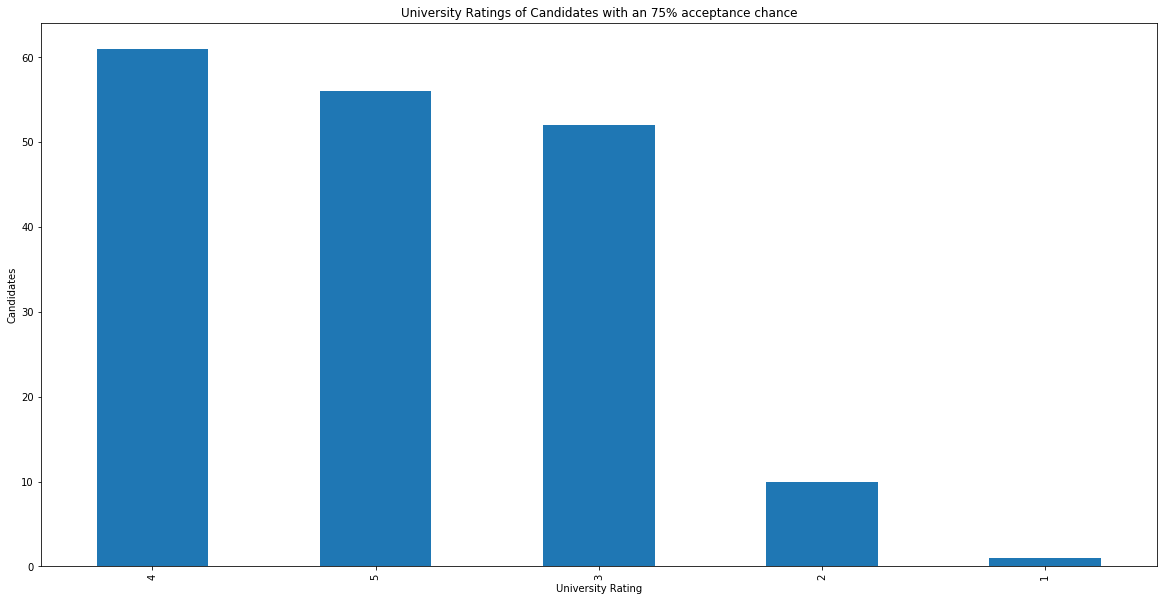

In [15]:
s = df[df["ChanceOfAdmit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

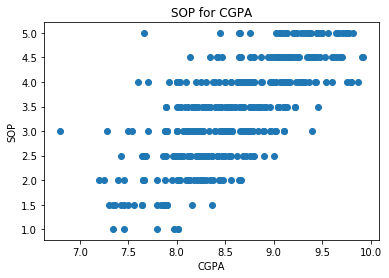

In [16]:
plt.scatter(df['CGPA'], df['SOP'])
plt.title("SOP for CGPA")
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.show()

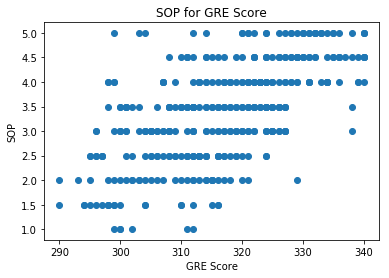

In [17]:
plt.scatter(df["GRE Score"], df.SOP)
plt.title("SOP for GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.show()

# APPLYING REGRESSSION ALGORITHMS

In [18]:
df = pd.read_csv("Admission_Predict.csv", sep = ',')

In [19]:
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})


In [20]:
y = df['ChanceOfAdmit'].values
x = df.drop(['ChanceOfAdmit'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range = (0,1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

D:\Programs\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Programs\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Programs\lib\site-packages\ipykern

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score : ", r2_score(y_test, y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset) : ", r2_score(y_train, y_head_lr_train))

real value of y_test[1]: 0.68 -> the predict: [0.72368741]
real value of y_test[2]: 0.9 -> the predict: [0.93536809]
r_square score :  0.821208259148699
r_square score (train dataset) :  0.7951946003191086


# Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train, y_train)
y_head_rfr = rfr.predict(x_test)

from sklearn.metrics import r2_score
print("r_squre score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))

y_head_rfr_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train, y_head_rfr_train))

r_squre score:  0.8074111823415694
real value of y_test[1]: 0.68 -> the predict: [0.7249]
real value of y_test[2]: 0.9 -> the predict: [0.9407]
r_square score (train dataset):  0.9634880602889714


# Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train, y_train)
y_head_dtr = dtr.predict(x_test)

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train, y_head_dtr_train))

r_square score:  0.6262105228127393
real value of y_test[1]: 0.68 -> the predict: [0.73]
real value of y_test[2]: 0.9 -> the predict: [0.94]
r_square score (train dataset):  1.0


# Comparison between all the algorithms

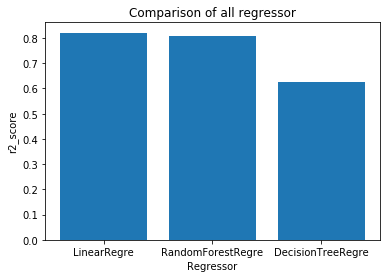

In [26]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegre","RandomForestRegre", "DecisionTreeRegre"]
plt.bar(x,y)
plt.title("Comparison of all regressor")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [27]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.94 -> the predict: [0.92863016]
real value of y_test[5]: 0.94 -> the predict: [0.9167]
real value of y_test[5]: 0.94 -> the predict: [0.91]

real value of y_test[50]: 0.86 -> the predict: [0.89624998]
real value of y_test[50]: 0.86 -> the predict: [0.9111]
real value of y_test[50]: 0.86 -> the predict: [0.93]


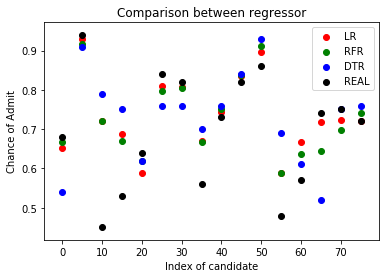

In [28]:
red = plt.scatter(np.arange(0,80,5), y_head_lr[0:80:5], color = 'red')
green = plt.scatter(np.arange(0,80,5), y_head_rfr[0:80:5], color = 'green')
blue = plt.scatter(np.arange(0,80,5), y_head_dtr[0:80:5], color = 'blue')
black = plt.scatter(np.arange(0,80,5), y_test[0:80:5], color = 'black')
plt.title("Comparison between regressor")
plt.xlabel("Index of candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black), ('LR','RFR','DTR','REAL'))
plt.show()

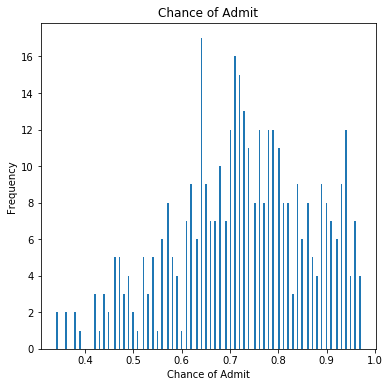

In [29]:
df["ChanceOfAdmit"].plot(kind = 'hist', bins=200, figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

# Classification Algorithms

In [30]:
df = pd.read_csv("Admission_Predict.csv", sep = ',')

In [31]:
serialNo = df['Serial No.'].values
df.drop(['Serial No.'], axis=1, inplace=True)

In [32]:
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})

In [33]:
y = df['ChanceOfAdmit'].values
x = df.drop(['ChanceOfAdmit'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range = (0,1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

D:\Programs\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Programs\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Programs\lib\site-packages\ipykern

In [36]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]


y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

# Logistic Regression

the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


D:\Programs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


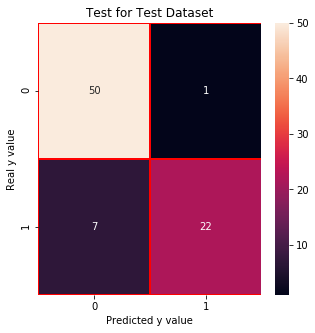

Precision score:  0.9565217391304348
Recall score:  0.7586206896551724
F1 score:  0.8461538461538461


In [37]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train_01)
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(lrc.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(lrc.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01, lrc.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, lrc.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, lrc.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, lrc.predict(x_test)))

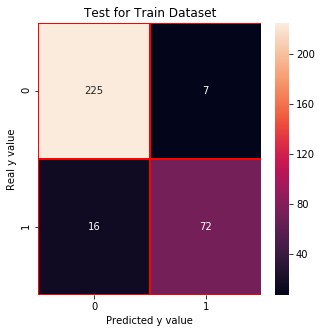

In [38]:
cm_lrc_train = confusion_matrix(y_train_01, lrc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# Support Vector Machine

the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


D:\Programs\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


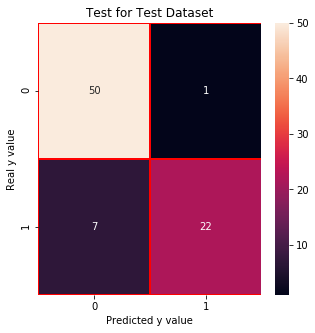

Precision score:  0.9565217391304348
Recall score:  0.7586206896551724
F1 score:  0.8461538461538461


In [39]:
from sklearn.svm import SVC
svc = SVC(random_state = 1)
svc.fit(x_train, y_train_01)
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(svc.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(svc.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test_01, svc.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, svc.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, svc.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, svc.predict(x_test)))

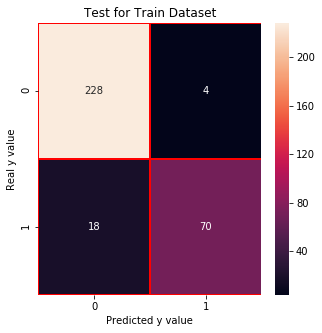

In [40]:
cm_svc_train = confusion_matrix(y_train_01, svc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# Gaussian Naive Bayes

the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


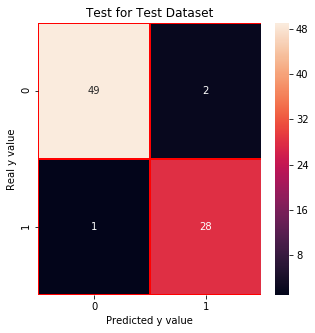

Precision score:  0.9333333333333333
Recall score:  0.9655172413793104
F1 score:  0.9491525423728815


In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train_01)
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(nb.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(nb.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01, nb.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, nb.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, nb.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, nb.predict(x_test)))

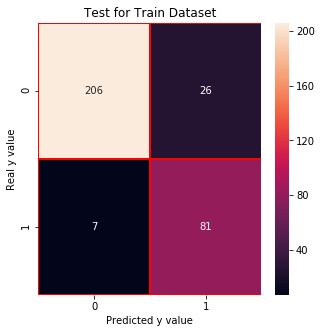

In [42]:
cm_nb_train = confusion_matrix(y_train_01, nb.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# Decision Tree Classification

the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


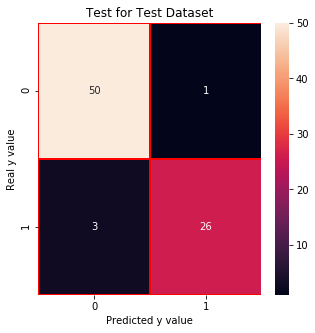

Precision score:  0.9629629629629629
Recall score:  0.896551724137931
F1 score:  0.9285714285714286


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train_01)
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(dtc.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(dtc.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, dtc.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, dtc.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, dtc.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, dtc.predict(x_test)))

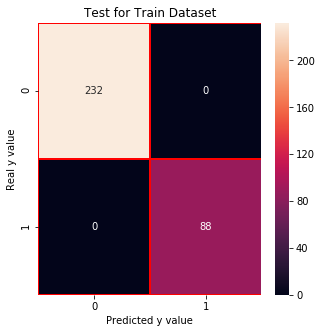

In [44]:
cm_dtc_train = confusion_matrix(y_train_01, dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# Random Forest Classifier

the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


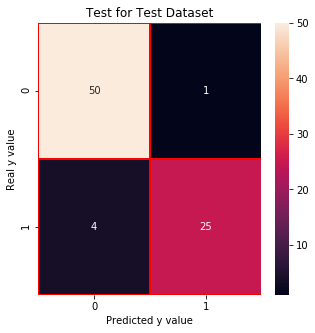

Precision score:  0.9615384615384616
Recall score:  0.8620689655172413
F1 score:  0.9090909090909091


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 1 )
rfc.fit(x_train, y_train_01)
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(rfc.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(rfc.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, rfc.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, rfc.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, rfc.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, rfc.predict(x_test)))

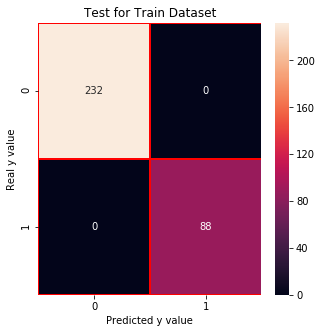

In [46]:
cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# K Nearest Neighbour

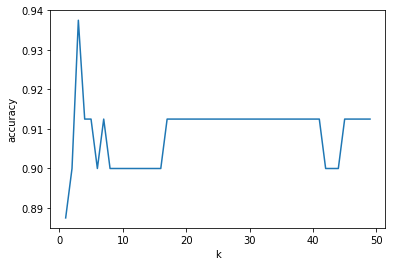

score of 3 : 0.9375
the real value of y_test_01[1]0-> the predict[0]
the real value of y_test_01[2]1-> the predict[1]


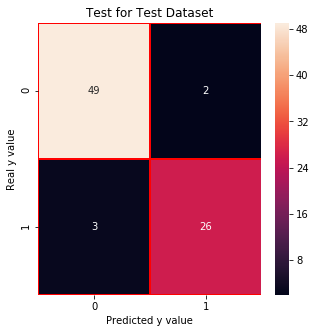

Precision score:  0.9285714285714286
Recall score:  0.896551724137931
F1 score:  0.912280701754386


In [47]:
from sklearn.neighbors import KNeighborsClassifier

# finding the value of K
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("the real value of y_test_01[1]" + str(y_test_01[1]) + "-> the predict" + str(knn.predict(x_test.iloc[[1],:])))
print("the real value of y_test_01[2]" + str(y_test_01[2]) + "-> the predict" + str(knn.predict(x_test.iloc[[2],:])))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01, knn.predict(x_test))

# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score: ", precision_score(y_test_01, knn.predict(x_test)))
print("Recall score: ", recall_score(y_test_01, knn.predict(x_test)))
print("F1 score: ", f1_score(y_test_01, knn.predict(x_test)))

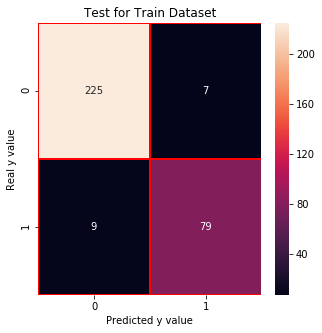

In [48]:
cm_knn_train = confusion_matrix(y_train_01, knn.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# Comparison of Classification Algorithms

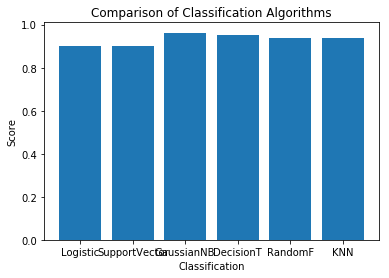

In [49]:
y = np.array([lrc.score(x_test, y_test_01), svc.score(x_test, y_test_01), nb.score(x_test, y_test_01), 
              dtc.score(x_test, y_test_01), rfc.score(x_test, y_test_01), knn.score(x_test, y_test_01)])
x = ['Logistic', 'SupportVector', 'GaussianNB','DecisionT','RandomF','KNN']
plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classification")
plt.ylabel("Score")
plt.show()

# Clustering Algorithms(Unsupervised Learning)

In [50]:
df = pd.read_csv("Admission_Predict.csv", sep = ',')

In [51]:
serialNo = df['Serial No.'].values
df.drop(['Serial No.'], axis=1, inplace=True)

In [52]:
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})

In [53]:
df = (df- np.min(df))/(np.max(df)-np.min(df))

In [54]:
y = df.ChanceOfAdmit
x = df.drop(["ChanceOfAdmit"], axis=1)

# Principle Component Analysis

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten = True)
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(400,)
dictonary = {"x":x_pca, "y":y}
data = pd.DataFrame(dictonary)
print("data:")
print(data.head())
print("\n df:")
print(df.head())

data:
          x         y
0 -1.377553  0.920635
1 -0.919033  0.666667
2 -0.320986  0.603175
3 -0.520960  0.730159
4  1.137743  0.492063

 df:
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


# K Means Clustering

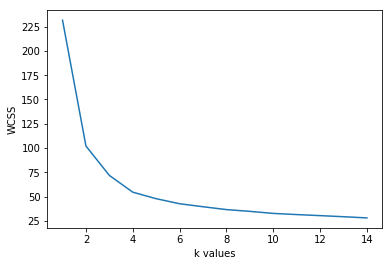

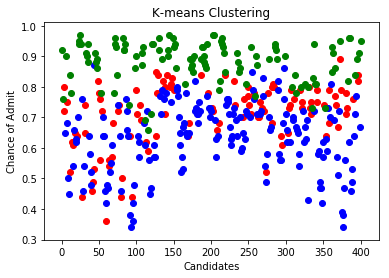

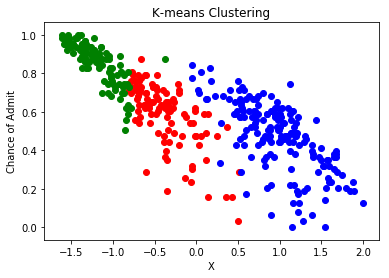

In [61]:
serial = df["Serial No."].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn


plt.scatter(df[df.label_kmeans == 0 ]["Serial No."],df[df.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["Serial No."],df[df.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["Serial No."],df[df.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

# Hierarchical Clustering

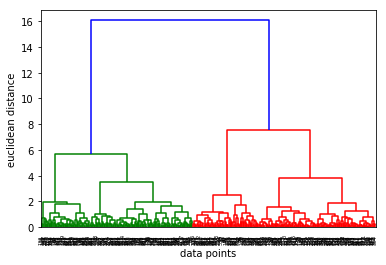

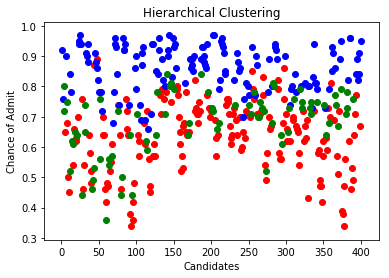

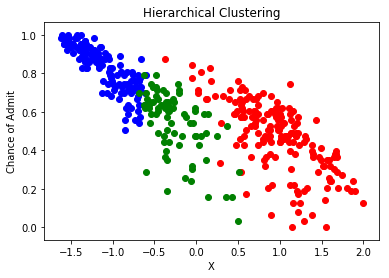

In [62]:
serial = df["Serial No."].values 

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(x)

df["label_hiyerartical"] = clusters_hiyerartical

plt.scatter(df[df.label_hiyerartical == 0 ]["Serial No."],df[df.label_hiyerartical == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_hiyerartical == 1 ]["Serial No."],df[df.label_hiyerartical == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_hiyerartical == 2 ]["Serial No."],df[df.label_hiyerartical == 2].ChanceOfAdmit,color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

plt.scatter(data[df.label_hiyerartical == 0 ].x,data.y[df.label_hiyerartical == 0],color = "red")
plt.scatter(data[df.label_hiyerartical == 1 ].x,data.y[df.label_hiyerartical == 1],color = "blue")
plt.scatter(data[df.label_hiyerartical == 2 ].x,data.y[df.label_hiyerartical == 2],color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

In [58]:
print(df.head())

   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


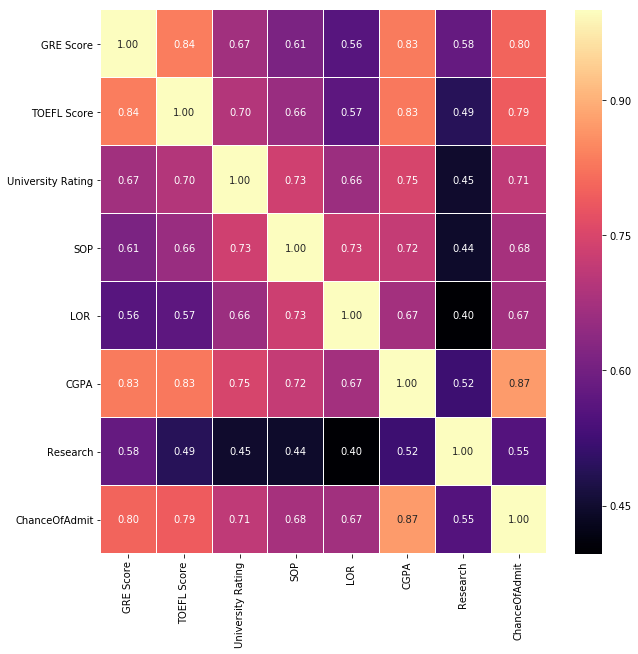

In [59]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [60]:
df = pd.read_csv("Admission_Predict.csv",sep = ",")
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
newDF = pd.DataFrame()
newDF["GRE Score"] = df["GRE Score"]
newDF["TOEFL Score"] = df["TOEFL Score"]
newDF["CGPA"] = df["CGPA"]
newDF["Chance of Admit"] = df["ChanceOfAdmit"]

y_new = df["ChanceOfAdmit"].values
x_new = df.drop(["ChanceOfAdmit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train_new, x_test_new,y_train_new, y_test_new = train_test_split(x_new,y_new,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(x_train_new,y_train_new)
y_head_lr_new = lr_new.predict(x_test_new)

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test_new,y_head_lr_new))

r_square score:  0.8212241793299225
